# Worksheet 16

Name:  Hemant Kumar Singh <br>
UID: U17284611

### Topics

- Logistic Regression

## Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

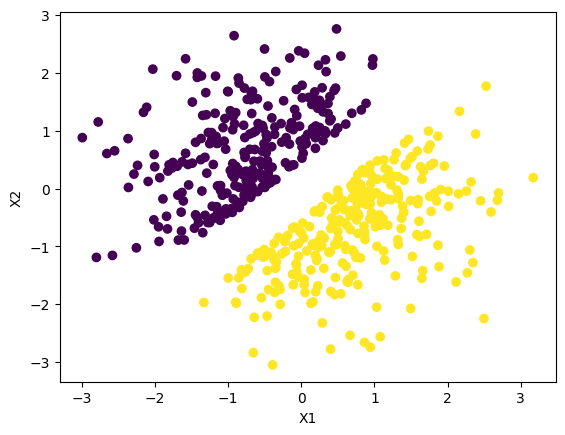

In [3]:
X, Y = generate_line_data()

plt.scatter(X[:, 0], X[:, 1], c=Y)

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [4]:
model = LogisticRegression().fit(X, Y)
model.coef_
model.intercept_

array([0.05839469])

c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

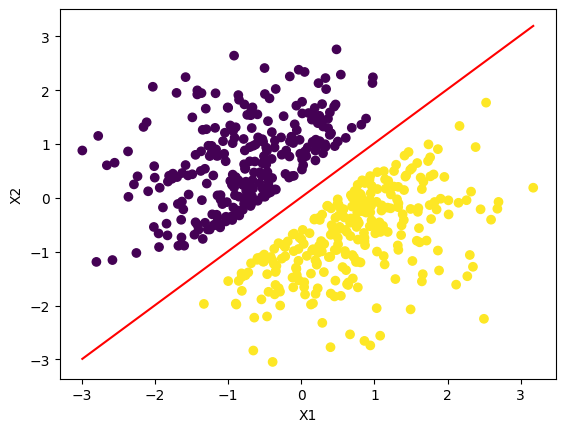

In [5]:
# Generate linearly separable data
X, Y = generate_line_data()

# Fit a logistic regression model
model = LogisticRegression().fit(X, Y)

# Get the coefficients
coef = model.coef_[0]
intercept = model.intercept_

# Calculate the slope and intercept of the line
slope = -coef[0] / coef[1]
intercept = -intercept / coef[1]

# Create the line
line_x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
line_y = slope * line_x + intercept

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=Y)

# Plot the line
plt.plot(line_x, line_y, '-r')

# Set plot labels
plt.xlabel('X1')
plt.ylabel('X2')

# Show the plot
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

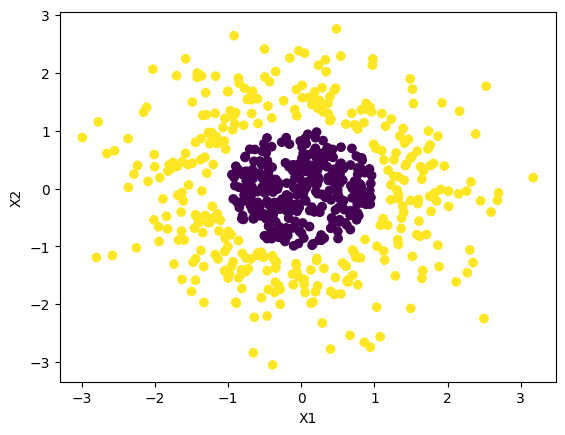

In [6]:
# Generate circular data
X, Y = generate_circle_data(t)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=Y)

# Set plot labels
plt.xlabel('X1')
plt.ylabel('X2')

# Show the plot
plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [8]:
X_transformed = PolynomialFeatures(degree=2).fit_transform(X)

model = LogisticRegression().fit(X_transformed, Y)

f) Plot the decision boundary using the code below.

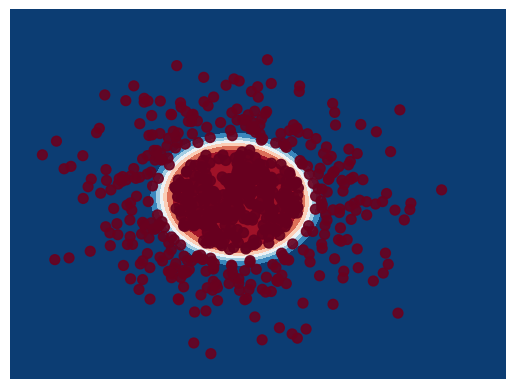

In [10]:
# # create a mesh to plot in
# h = .02  # step size in the mesh
# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))
# meshData = np.c_[xx.ravel(), yy.ravel()]

# fig, ax = plt.subplots()
# A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
# Z = model.predict(meshData).reshape(xx.shape)
# ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
# ax.axis('off')

# # Plot also the training points
# ax.scatter(X[:, 0], X[:, 1], color=cs[Y].tolist(), s=50, alpha=0.9)
# plt.show()

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]
cs = plt.cm.RdBu

fig, ax = plt.subplots()
A = model.predict_proba(PolynomialFeatures(degree=2).fit_transform(meshData))[:, 1].reshape(xx.shape)
Z = model.predict(PolynomialFeatures(degree=2).fit_transform(meshData)).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap=cs, vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=cs(Y).tolist(), s=50, alpha=0.9)
plt.show()


g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

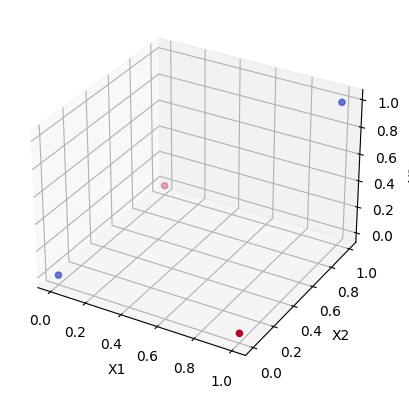

In [11]:
# %matplotlib widget # Requires: pip3 install ipympl

# from mpl_toolkits.mplot3d import Axes3D

# ax = plt.axes(projection='3d')
# ax.scatter3D(..., ..., ...)
# plt.show()

# Generate XOR data with an additional interaction term
X, Y = generate_xor_data()
X_transformed = np.hstack((X, np.expand_dims(X[:,0] * X[:,1], axis=1)))

# Plot the data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=Y, cmap='coolwarm')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1*X2')
plt.show()


h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

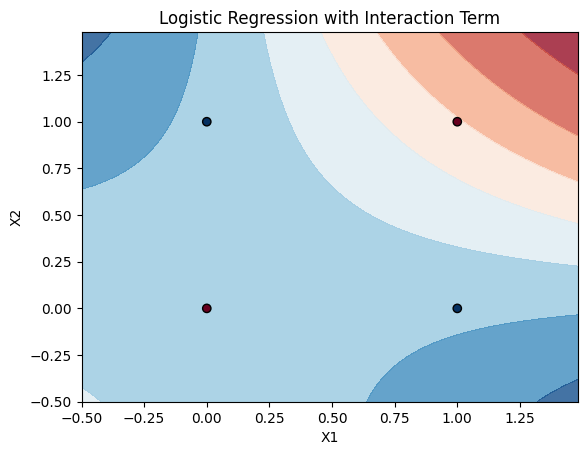

In [13]:
# poly = PolynomialFeatures(interaction_only=True)
# lr = LogisticRegression(verbose=2)
# model = make_pipeline(poly, lr).fit(X, Y)

# ...

# Generate XOR data with an additional interaction term
X, Y = generate_xor_data()
X_transformed = np.hstack((X, np.expand_dims(X[:,0] * X[:,1], axis=1)))

# Fit a logistic regression model using the interaction term
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression()
model = make_pipeline(poly, lr).fit(X_transformed, Y)

# Define a meshgrid to plot the decision boundary
h = 0.02
x_min, x_max = X_transformed[:, 0].min() - .5, X_transformed[:, 0].max() + .5
y_min, y_max = X_transformed[:, 1].min() - .5, X_transformed[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel(), (xx.ravel() * yy.ravel())]

# Calculate the probability of class 1 for each point in the meshgrid
Z = model.predict_proba(meshData)[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the original data points
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=Y, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with Interaction Term')
plt.show()


i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

C:\Users\iamhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


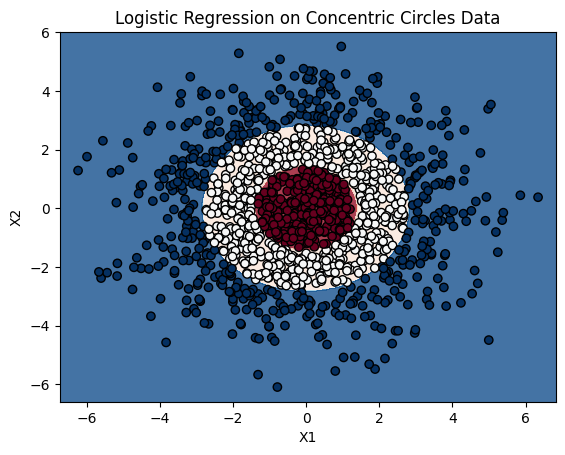

In [17]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)


# Compute the radius squared feature
X_radius2 = X[:, 0]**2 + X[:, 1]**2
X_radius2 = X_radius2.reshape(-1, 1)

# Apply polynomial features to the 2D coordinates only
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X[:, :2])

# Concatenate the polynomial features with the radius squared
X_transformed = np.concatenate([X_poly, X_radius2], axis=1)

# Fit a logistic regression model
lr = LogisticRegression()
model = lr.fit(X_transformed, Y)

# Define a meshgrid to plot the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute the radius squared feature for the meshgrid
mesh_radius2 = xx.ravel()**2 + yy.ravel()**2
mesh_radius2 = mesh_radius2.reshape(-1, 1)

# Apply polynomial features to the 2D coordinates of the meshgrid only
mesh_poly = poly.transform(np.c_[xx.ravel(), yy.ravel()])

# Concatenate the polynomial features with the radius squared of the meshgrid
meshData = np.concatenate([mesh_poly, mesh_radius2], axis=1)

# Calculate the predicted class for each point in the meshgrid
Z = model.predict(meshData)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the original data points
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression on Concentric Circles Data')
plt.show()





